## 🦉 COSADAMA WEEK 5-2. 네이버 영화 평점 순 크롤링

KEYWORDS : HTML/CSS, 정규표현식, BeautifulSoup, urllib, matplotlib

### 5.1 urllib & BeautifulSoup으로 사이트 접근하기

영화 제목, 평점, 날짜 가져오기

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [67]:
url_base = 'https://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200418'

page = url_base+url_syb
html = urlopen(page)
soup = BeautifulSoup(html, 'html.parser')
#soup

In [68]:
#soup.find_all('div', class_='tit5')

In [8]:
soup.find_all('div', class_='tit5')[0].a['title'] #omg

'어벤져스: 엔드게임'

In [9]:
soup.find_all('div', class_='tit5')[0].a.string

'어벤져스: 엔드게임'

In [11]:
soup.find_all('td', class_='point')[0].string

'9.38'

`soup.find_all`에서 안의 내용만 가져오는 법
1. **a[title]** a의 title만 가져와주세요!
2. **a.string** a의 문자열 부분 가져와주세요!

날짜에 따라 달라지는 것을 보고싶다면 날짜 순으로 데이터를 정렬해야 한다. 이럴 때에는 pd의 `date_range`를 사용한다.
날짜를 생성해주고 시간도 함께 출력할 수 있다.
```
pd.date_range('년도-날짜 입력', periods=표시하고 싶은 날짜 일수, freq='D' or 'H')
```
D = day, H = day & time

### 5.2 날짜를 데이터프레임에 불러오고, 만들기

In [12]:
date = pd.date_range('2019-12-01', periods=100, freq='D')
date

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16',
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
               '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
      

`urllib.parse.quote` ? 한글이나 숫자 -> url에 적합한 용어로 변환

이번 크롤링에서는 url주소에 날짜가 있기 때문에 이를 적절하게 바꾸어주기 위해 사용한다.

In [15]:
import urllib

url = urllib.parse.quote('파이썬')
url

'%ED%8C%8C%EC%9D%B4%EC%8D%AC'

In [17]:
import urllib

url = urllib.parse.quote('2020년04월19일')
url #?!

'2020%EB%85%8404%EC%9B%9419%EC%9D%BC'

### 5.3 `tqdm` 모듈로 100페이지 크롤링하기

In [27]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

date = pd.date_range('2019-12-01',periods=100, freq='D')

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    res = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(res, 'html.parser')
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0,end)])

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


`quote`에는 url 형식에 맞춰서 데이터 전달하는 것이 중요하다. `.strftime`은 형식에 맞춰서 '년,월,일'이 나타나도록 해주는 함수

한편 리스트에 `append`를 사용하지 않고 `extend` 함수를 사용했다. 그 둘의 차이점은?

`append()` VS `extend()`
1. append()는 object를 맨 뒤에 추가한다.
2. extend()는 iterable 객체(리스트, 튜플, 딕셔너리 etc)의 elements들을 list에 appending 시킨다.
-> 리스트에 딕셔너리 요소를 extend해도 실행된다! 결과값은 하나의 리스트처럼 나온다. 신기

In [28]:
a=[1,2,3]
a.extend({4,5})
print(a)

[1, 2, 3, 4, 5]


In [29]:
movie_date[:5]

[Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D')]

In [30]:
movie_name[:5]

['주전장', '교회오빠', '시간을 달리는 소녀', '윤희에게', '늑대아이']

In [31]:
movie_point[:5]

['9.49', '9.27', '9.20', '9.17', '9.11']

In [32]:
movie = pd.DataFrame({'date': movie_date, 'name': movie_name, 'point': movie_point})
movie.head(10)

,date,name,point
0,2019-12-01,주전장,9.49
1,2019-12-01,교회오빠,9.27
2,2019-12-01,시간을 달리는 소녀,9.20
3,2019-12-01,윤희에게,9.17
4,2019-12-01,늑대아이,9.11
5,2019-12-01,미쓰백,9.10
6,2019-12-01,아이리시맨,8.96
7,2019-12-01,벌새,8.89
8,2019-12-01,여배우는 오늘도,8.84
9,2019-12-01,너의 이름은.,8.76


만약 날짜가 아닌 영화별로 점수를 보고 싶다면? `pivot_table`

평점 = 점수의 평균으로 합산

In [35]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best #DataError: No numeric types to aggregate

DataError: No numeric types to aggregate

In [34]:
movie.info() #object -> 문자열이라 계산불가

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4499 non-null   datetime64[ns]
 1   name    4499 non-null   object        
 2   point   4499 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 105.6+ KB


In [36]:
#movie['point'] = float(movie['point']) TypeError: cannot convert the series to <class 'float'>

TypeError: cannot convert the series to <class 'float'>

In [37]:
movie['point'] = movie['point'].astype('float64')
movie['point'].sum()

37215.25

In [38]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best #DataError: No numeric types to aggregate

,point
name,
그린 북,9.606667
가버나움,9.590000
포드 V 페라리,9.540729
주전장,9.510000
원더,9.490000
...,...
캣츠,4.710238
미스터 주: 사라진 VIP,4.656842
얼굴없는 보스,3.437000


### 5.4 pandas의 `query` 함수로 평점 가져오기

`pd.query()`? 조건식을 문자열로 입력 받아 해당 조건에 만족하는 행을 추출하는 함수

불린 인덱싱(loc, iloc...)과 비슷하지만 데이터 처리 속도가 더 빠르다!

In [39]:
tmp = movie.query('name == ["82년생 김지영"]')
tmp

,date,name,point
39,2019-12-01,82년생 김지영,6.69
87,2019-12-02,82년생 김지영,6.69
133,2019-12-03,82년생 김지영,6.69
181,2019-12-04,82년생 김지영,6.68
231,2019-12-05,82년생 김지영,6.68
...,...,...,...
3727,2020-02-21,82년생 김지영,6.69
3769,2020-02-22,82년생 김지영,6.69
3812,2020-02-23,82년생 김지영,6.69
3855,2020-02-24,82년생 김지영,6.69


### 5.5 matplotlib로 시각화하기

No handles with labels found to put in legend.


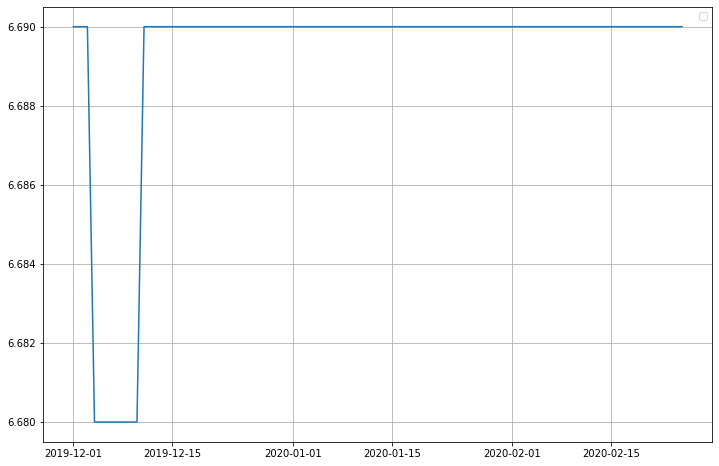

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best') #범례
plt.grid()
plt.show()

**영화별 날짜 변화에 따른 평점 변화 시각화**

In [59]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head(10)

point                                                               \
name        1917 21 브릿지: 테러 셧다운 7번방의 선물 82년생 김지영  가버나움 가장 따뜻한 색, 블루 가장 보통의 연애   
date                                                                            
2019-12-01   NaN            NaN     NaN     6.69   NaN          NaN      7.83   
2019-12-02   NaN            NaN     NaN     6.69   NaN          NaN      7.83   
2019-12-03   NaN            NaN     NaN     6.69   NaN          NaN       NaN   
2019-12-04   NaN            NaN     NaN     6.68   NaN          NaN       NaN   
2019-12-05   NaN            NaN     NaN     6.68   NaN          NaN       NaN   
2019-12-06   NaN            NaN     NaN     6.68   NaN          NaN       NaN   
2019-12-07   NaN            NaN     NaN     6.68   NaN          NaN       NaN   
2019-12-08   NaN            NaN     NaN     6.68  9.59          NaN       NaN   
2019-12-09   NaN            NaN     NaN     6.68  9.59          NaN       NaN   
2019-12-10   NaN            NaN     NaN     6.68  9.59          NaN       NaN   

                                 ...                                       \
name       감쪽같은 그녀 걸어도 걸어도 겟 아웃  ... 하이큐!! 승자와 패자 하이큐!! 재능과 센스 항거:유관순 이야기   
date                             ...                                        
2019-12-01     NaN     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-02     NaN     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-03     NaN     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-04     NaN     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-05     NaN     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-06    8.21     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-07    8.05     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-08    7.90     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-09    7.80     NaN  NaN  ...          NaN          NaN        NaN   
2019-12-10    7.70     NaN  NaN  ...          NaN          NaN        NaN   

                                                                    
name       해리 포터와 아즈카반의 죄수 해치지않아 해피 엔드 핵소 고지 행동하는 양심 김대중 환상의 빛 히트맨  
date                                                                
2019-12-01             NaN   NaN  8.27   NaN         NaN   NaN NaN  
2019-12-02             NaN   NaN  8.27   NaN         NaN   NaN NaN  
2019-12-03             NaN   NaN  8.27   NaN        2.83   NaN NaN  
2019-12-04             NaN   NaN  8.27   NaN        3.19   NaN NaN  
2019-12-05             NaN   NaN  8.27   NaN        3.15   NaN NaN  
2019-12-06             NaN   NaN  8.27   NaN        3.10   NaN NaN  
2019-12-07             NaN   NaN  8.27   NaN         NaN   NaN NaN  
2019-12-08             NaN   NaN  8.27   NaN        3.06   NaN NaN  
2019-12-09             NaN   NaN  8.27   NaN        3.05   NaN NaN  
2019-12-10             NaN   NaN  8.27   NaN        3.08   NaN NaN  

[10 rows x 193 columns]

In [60]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

#droplevel 지정한 칼럼이나 인덱스 drop, 아마 point를 없애주려고 그냥 쓴게 아닐까..

name,1917,21 브릿지: 테러 셧다운,7번방의 선물,82년생 김지영,가버나움,"가장 따뜻한 색, 블루",가장 보통의 연애,감쪽같은 그녀,걸어도 걸어도,겟 아웃,...,하이큐!! 승자와 패자,하이큐!! 재능과 센스,항거:유관순 이야기,해리 포터와 아즈카반의 죄수,해치지않아,해피 엔드,핵소 고지,행동하는 양심 김대중,환상의 빛,히트맨
date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,NaN,NaN,NaN,6.69,NaN,NaN,7.83,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.27,NaN,NaN,NaN,NaN
2019-12-02,NaN,NaN,NaN,6.69,NaN,NaN,7.83,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.27,NaN,NaN,NaN,NaN
2019-12-03,NaN,NaN,NaN,6.69,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.27,NaN,2.83,NaN,NaN
2019-12-04,NaN,NaN,NaN,6.68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.27,NaN,3.19,NaN,NaN
2019-12-05,NaN,NaN,NaN,6.68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.27,NaN,3.15,NaN,NaN


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform 
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

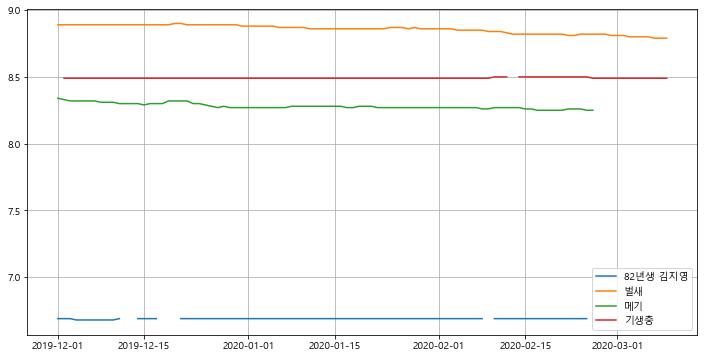

In [66]:
target_col = ['82년생 김지영','벌새','메기','기생충']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best') #좋은데에 네가 해줘
plt.grid()
plt.show()